<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/json-file-information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JSON Information Dataset Exploration

We're going to take a look at a few examples of how we can explore the JSON Information dataset. 

The first thing we need to do is enter the URL for our JSON Information dataset in the cell below. You can get this by right clicking the Download icon, and selecting "Copy Link".

In [1]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/TextFilesInformationExtraction/json-file-information.csv.gz?access=55SB7FN2YVCZUHZ4G32HSZ4OUUXQRPOZ' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/TextFilesInformationExtraction/json-file-information.csv.gz?access=55SB7FN2YVCZUHZ4G32HSZ4OUUXQRPOZ


## pandas

Next, we'll setup our environment so we can load our JSON Information dataset into [pandas](https://pandas.pydata.org) DataFrames. If you're unfamiliar with DataFrames, but you've worked with JSON before, you should feel comfortable pretty quick.

In [2]:
import pandas as pd

## Data Table Display

Colab includes an extension that renders pandas DataFrames into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides, and doing some intital filtering!

Data table display for pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [3]:
%load_ext google.colab.data_table

## Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [4]:
json = pd.read_csv(dataset, compression='gzip')
json

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1,content
0,20200629191723,https://api.ualberta.cloud/news?feed=http%3A%2...,news,txt,application/json,text/plain,bc08cb947075f3431ecfaffa1049d7bd,4ee6b136cdc399b5d7e47711a54194bfe7cc64fb,"{""Authors"":null,""BaseUri"":null,""Categories"":nu..."
1,20200629191731,https://api.ualberta.cloud/news?feed=http%3A%2...,news,txt,application/json,text/plain,76a508c5d60b18499d89ed4225c12805,e2b55aa9b8de854edfb6bfbbe7617e08fbc072e0,"{""Authors"":null,""BaseUri"":null,""Categories"":nu..."
2,20200629191731,https://live.clive.cloud/page-views/162/visito...,register,txt,application/json,text/plain,6ebb9dbd1430ce0ae59e5eb4bc6df643,c307fcccd580f818cbce86b89f84f4a256075e01,"{""success"":false,""message"":""No referer""}"
3,20200629192519,https://www.ualberta.ca/_emergency/emergency-m...,emergency-message.json,txt,application/json,text/plain,ede9208596933d7d68ce430f2a41eed4,4ed4fd7ced06b3c18d30505b7557aa74388627e9,"{""message"": ""<h4 class=\""d-inline-block mr-2\""..."
4,20200629192600,https://www.ualberta.ca/api/twitter/ualberta?c...,ualberta,txt,application/json,text/plain,29644a7f57e55fc2514d8c9c3e1cb004,0d013d3cf48dc57bf210a03a060df5497c289b82,"{""ScreenName"":""ualberta"",""Followers"":87166,""Tw..."
...,...,...,...,...,...,...,...,...,...
67772,20220704195148,https://mathnews.uwaterloo.ca/wp-json/wp/v2/ta...,255,txt,application/json,text/plain,70451eb928d75f50b20a005c84723754,2ed136229c813bd7e5bc334073344758a896ff17,"{""id"":255,""count"":1,""description"":"""",""link"":""h..."
67773,20220704195428,https://mathnews.uwaterloo.ca/wp-json/wp/v2/po...,13404,txt,application/json,text/plain,f2e20bd5c62bbb6379cce72c20c48c17,b53020d04bec5ebf91ad62279cebd3621bc64996,"{""id"":13404,""date"":""2019-03-15T00:00:41"",""date..."
67774,20220704195637,https://mathnews.uwaterloo.ca/wp-json/oembed/1...,embed,txt,application/json,text/plain,f6597e3d54973f35e598ee9fae20f097,1530ae9abe7a251c821bfc6433e4001d42f4a20a,"{""version"":""1.0"",""provider_name"":""mathNEWS"",""p..."
67775,20220704200319,https://mathnews.uwaterloo.ca/wp-json/wp/v2/ta...,254,txt,application/json,text/plain,1fca280e7e0bbefd4863de960e04d2df,2af84c213b4a291da953cfda4253f6124317bef3,"{""id"":254,""count"":1,""description"":"""",""link"":""h..."


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files

Let's take a quick look at how to count items in DataFrames, and use total and unique files as an example to work with.

It's definitely work checking out the [pandas documentation](https://pandas.pydata.org/docs/index.html). There are a lot of good examples available, along with a robust [API reference](https://pandas.pydata.org/docs/reference/index.html#api).


### How many json files are in this collection?

We can take our `json` variable try a couple of functions to get the same answer.

1.   `len(json.index)`
  * Get the length of the DataFrame's index.
2.   `json.shape[0]`
  * Get the shape or dimensionality of the DataFrame, and take the first item in the tuple.
3.  `json.count()`
  * Count the number of rows for each column.



In [5]:
len(json.index)

67777

In [6]:
json.shape[0]

67777

In [7]:
json.count()

crawl_date              67777
url                     67777
filename                60564
extension               67777
mime_type_web_server    67777
mime_type_tika          37787
md5                     67777
sha1                    67777
content                 37787
dtype: int64

### How many unique json files are in the collection?

 We can see if an json files is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it, and comparing them. The exact same json file might have a filename of `example.jpg` or `foo.jpg`. If the hash is computed for each, we can see that even with different file names, they are actually the same json file. So, since we have both a `MD5` and `SHA1` hash column available in our DataFrame, we can just find the unique values, and count them!




In [8]:
len(json.md5.unique())

36999

### What are the top 10 most occurring json files in the collection?

Here we can take advantage of [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) to provide us with a list of MD5 hashes, and their respective counts.

In [9]:
json["md5"].value_counts().head(10)

d41d8cd98f00b204e9800998ecf8427e    29990
d751713988987e9331980363e24189ce        9
99914b932bd37a50b983c5e7c90ae93b        3
84b4f4805ed723df479dd089028725e2        2
aa2b863419e53e7113af1db86f795c18        2
85a645a8bc98520c67cdc0807f53f445        2
9249078298bef88f5c84061e97ab1a38        2
03c9c3df91b3cfcbfc2fe454ff148539        2
8638563604634f6fb81bdc70c5c892f7        2
256136f133e5954eb8e36f75bdd32a79        2
Name: md5, dtype: int64


### What's the information around all of the occurances of `d41d8cd98f00b204e9800998ecf8427e`?

What, you mean you don't know what `d41d8cd98f00b204e9800998ecf8427e` means? 

Let's find those json files in the DataFrame. We can here see some of the filenames used, it's dimensions, and it's URL.


In [10]:
json.loc[json["md5"] == "d41d8cd98f00b204e9800998ecf8427e"]

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1,content
8,20200630031113,https://www.ualberta.ca/_emergency/emergency-m...,emergency-message.json,json,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
10,20200630151722,https://www.ualberta.ca/api/mediagallery/folder,folder,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
14,20200630151815,https://www.ualberta.ca/api/camps/search,search,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
21,20200706143310,https://www.ualberta.ca/api/givingfaculties/fa...,faculties,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
23,20200706143316,https://www.ualberta.ca/api/givingprojects/pri...,priorities,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
...,...,...,...,...,...,...,...,...,...
67742,20220704150326,http://iwarrior.uwaterloo.ca/wp-json/wp/v2/tag...,252,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
67743,20220704150856,https://mathsoc.uwaterloo.ca/wp-json/wp/v2/tri...,tribe_organizer,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
67747,20220704151138,https://mathsoc.uwaterloo.ca/wp-json/wp/v2/ava...,avada_portfolio,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN
67748,20220704151259,https://mathsoc.uwaterloo.ca/wp-json/wp/v2/ava...,avada_faq,unknown,application/json,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709,NaN


### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `embed` for example, might actually be referring to different json files who happen to have the same name.

Here we can use `value_counts()` again, but this time we'll create a variable for the top filenames so we can use it later.



In [11]:
top_filenames = json["filename"].value_counts().head(10)
top_filenames

embed         17607
index.php      8515
comments       5630
media          3546
posts          1383
categories     1293
tags           1270
v1              743
browse          724
pages           363
Name: filename, dtype: int64

### Let's create our first graph!

We'll plot the data first with pandas [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) functionality, and then plot the data with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

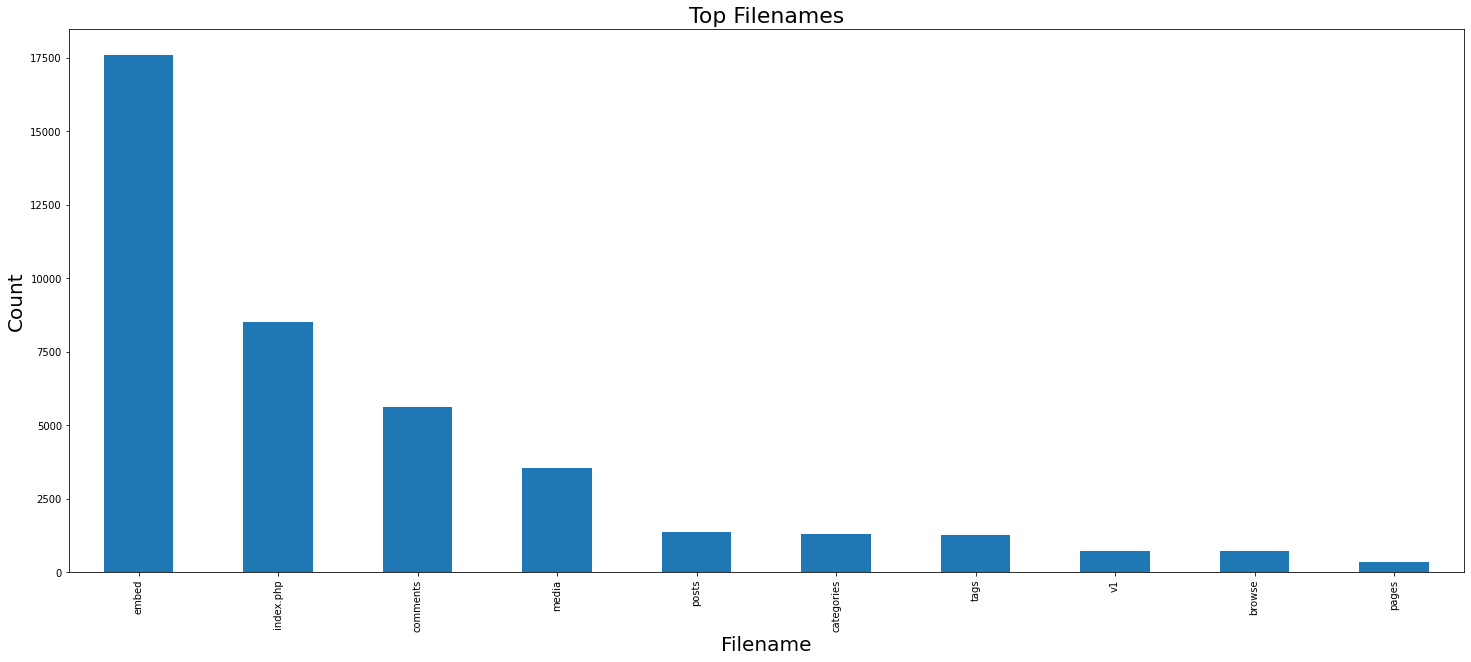

In [12]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25, 10))

top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup [Altair](https://altair-viz.github.io/), and plot the data with Altair. Altair is useful for creating vizualizations since they can be easily exported as a PNG or SVG.

In [13]:
import altair as alt

In [14]:
top_filenames_altair = (
    json["filename"]
    .value_counts()
    .head(10)
    .rename_axis("Filename")
    .reset_index(name="Count")
)

filenames_bar = (
    alt.Chart(top_filenames_altair)
    .mark_bar()
    .encode(x=alt.X("Filename:O", sort="-y"), y=alt.Y("Count:Q"))
)

filenames_rule = (
    alt.Chart(top_filenames_altair).mark_rule(color="red").encode(y="mean(Count):Q")
)


filenames_text = filenames_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(filenames_bar + filenames_rule + filenames_text).properties(
    width=1400, height=700, title="Top Filenames"
)

alt.LayerChart(...)

### How about a file format distribution?

What _kind_ of json files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [15]:
json_mime_types = (
    json["mime_type_tika"]
    .value_counts()
    .head(5)
    .rename_axis("MIME Type")
    .reset_index(name="Count")
)

json_mimes_bar = (
    alt.Chart(json_mime_types)
    .mark_bar()
    .encode(x=alt.X("MIME Type:O", sort="-y"), y=alt.Y("Count:Q"))
)

json_mime_rule = (
    alt.Chart(json_mime_types).mark_rule(color="red").encode(y="mean(Count):Q")
)

json_mime_text = json_mimes_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(json_mimes_bar + json_mime_rule + json_mime_text).properties(
    width=1400, height=700, title="JSON File Format Distribution"
)

alt.LayerChart(...)

### How do I get the actual json?

...or, how do I get to the actual binary files described by each file format information derivative?

There are a few options!

1. `wget` or `curl` from the live URL, or a replay URL
  * Live web URL
    * `wget` or `curl` the value of the `url` column
  * Replay web URL
    * `wget` or `curl` the value of the `crawl_date` and `url` column using the following pattern:
      * `https://web.archive.org/web/` + `crawl_date` + `/` + `url`
        * https://web.archive.org/web/20120119124734/http://www.archive.org/images/glogo.png
      * `http://wayback.archive-it.org/14462/` + `crawl_date` + `/` + `url`
        * https://wayback.archive-it.org/14462/20210524212740/https://ruebot.net/visualization/elxn42/featured_hu33a17dfb90e2c5ed77f783db14a6e53a_5126291_550x0_resize_q90_box_2.png
2. Use a scripting language, such as Python
  * Make use of the `url` and `filename` columns (and `crawl_date` if you want to use the replay URL)
  * `import requests`
  * `requests.get(url, allow_redirects=True)`
  * `open('filename', 'wb').write(r.content)`
3. Use the [Archives Unleashed Toolkit](https://aut.docs.archivesunleashed.org/docs/extract-binary) (if you have access to the W/ARC files).

If you wanted to download the json files using the replay URL, below a method for doing so.

First, you'll want to setup a replay url base url. Here we'll use the Archive-It Wayback instance for the collection.

In [16]:
wayback_url = 'http://wayback.archive-it.org/89/'

Next we'll create a new column using a lambda function. If you're familiar with working in jsons, what we're doing here is basically concatenating some column values together and creating a new column.

In [17]:
json['replay_url'] = json.apply(lambda row: str(wayback_url + str(row['crawl_date']) + "/" + row['url']), axis=1)

Then we can export that new column we created out to a file, so we can use it with `wget` to download all the json files!

In [18]:
json['replay_url'].head().to_csv('89_json_urls.txt', index=False, header=False)

Finally, we can pass the file to `wget` to use as a download list. You can also speed this process up using `xargs` or `parallel`.

In [19]:
!wget --random-wait -i 89_json_urls.txt

--2022-11-24 19:40:47--  http://wayback.archive-it.org/89/20200629191723/https://api.ualberta.cloud/news?feed=http%3A%2F%2Ffeeds.feedburner.com%2FUalbertaInTheQuadUalbertaOnMedium
Resolving wayback.archive-it.org (wayback.archive-it.org)... 207.241.232.8, 207.241.225.8
Connecting to wayback.archive-it.org (wayback.archive-it.org)|207.241.232.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘news?feed=http:%2F%2Ffeeds.feedburner.com%2FUalbertaInTheQuadUalbertaOnMedium’

news?feed=http:%2F%     [ <=>                ]   4.50K  --.-KB/s    in 0.001s  

2022-11-24 19:40:47 (6.57 MB/s) - ‘news?feed=http:%2F%2Ffeeds.feedburner.com%2FUalbertaInTheQuadUalbertaOnMedium’ saved [4613]

--2022-11-24 19:40:47--  http://wayback.archive-it.org/89/20200629191731/https://api.ualberta.cloud/news?feed=http%3A%2F%2Ffeeds.feedburner.com%2FUalbertaNoticesInTheQuadUalbertaOnMedium
Reusing existing connection to wayback.archive-it.org:80.
HTTP reques